In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd



/Users/wfairman/opt/anaconda3/envs/lab2/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Thrust Calibration

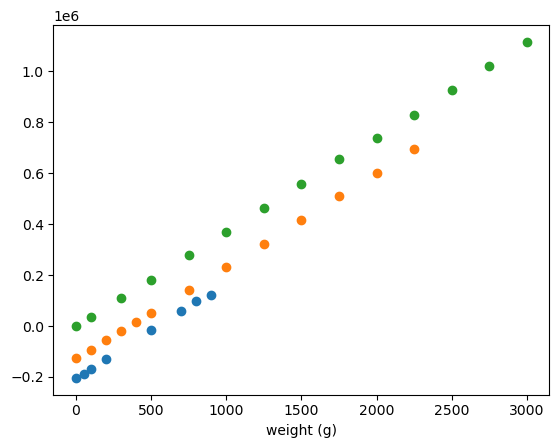

[    364.94817816 -130583.47214561]
[    371.01130464 -204238.09251101]
[  372.03390317 -1950.22837526]


In [2]:
x = [0,50,100,200,500,700,800,900]
y = [-203863,-186635,-168296,-131062,-15947,58347,96808,122530]


x1 = [0, 100, 200, 300, 400, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250]
y1 = [-125380, -92632,-56265,-21421,14018,49881,139798,231616,323566,415134,509439,600085,693954]

x2 = [0, 100, 300, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]
y2 = [-290, 34540, 108382, 182499, 277502, 370018, 462278, 556868, 657501, 739797, 830109, 927007, 1021380, 1115572]

plt.figure()
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.xlabel("weight (g)")
plt.show()

print(np.polyfit(x1, y1, 1))
print(np.polyfit(x, y, 1))
print(np.polyfit(x2, y2, 1))

## Results

In [3]:
def process_data_old(file, tperiod, c_cutoff):
    df = pd.read_csv(file)
    df_new = pd.DataFrame()
    # calculate time
    t0 = df.time[0]
    df_new['time'] = (df.time - t0) * tperiod
    # transfer data
    df_new['thrust'] = df.thrust / 1000
    df_new['voltage'] = df.voltage
    df_new['current'] = df.current
    df_new['power'] = df.power
    # delete bad current
    df_new.current[df_new.current < c_cutoff] = 0
    # calculate new parameters
    df_new['power'] = df_new.voltage * df_new.current
    
    return df_new
    
def process_data(file, tperiod, c_cutoff):
    df = pd.read_csv(file)
    # calculate time
    t0 = df.time[0]
    df['t'] = (df.time - t0) * tperiod
    df['thrust_kg'] = df.thrust / 1000

    return df
    


Text(0, 0.5, 'thrust')

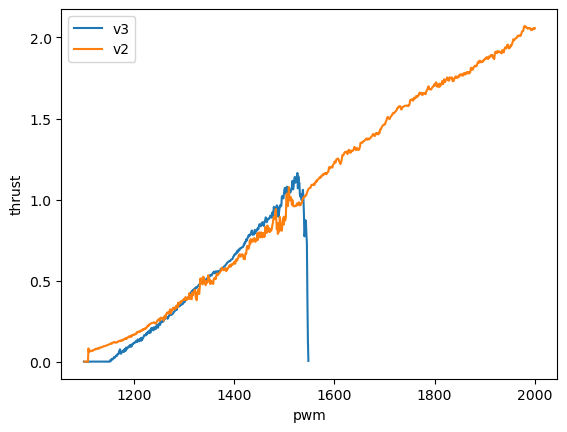

In [4]:
df = process_data('data/coxial_v3/2024-04-04-12-31-27.csv', 0.1, 4)
df2 = process_data('data/coaxial_small/2024-02-29-16-20-16.csv', 0.1, 4)

# plt.figure(figsize=(12,8))
# # plt.subplot(1,3,1)
# # plt.plot(df.t, df.pwm, 'r')
# # plt.legend(['pwm signal'])
# # plt.xlabel("time (sec)")
# plt.subplot(2,1,1)
# plt.plot(df.t, df.thrust_kg)
# plt.legend(['thrust (Kg)'])
# plt.xlabel("time (sec)")
# plt.subplot(2,1,2)
# plt.plot(df.t, df.current, 'g')
# plt.xlabel("time (sec)")
# plt.legend(['current'])
# plt.show()

plt.figure()
plt.plot(df.pwm, df.thrust_kg)
plt.plot(df2.pwm, df2.thrust_kg * 1.25)
plt.legend(['v3', 'v2'])
plt.xlabel("pwm")
plt.ylabel("thrust")

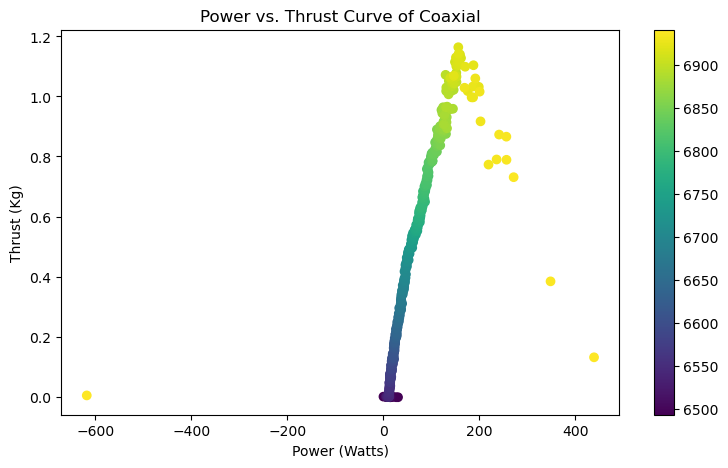

In [5]:
plt.figure(figsize=(9,5))
plt.scatter(df.power, df.thrust_kg, c=df.time)
plt.xlabel("Power (Watts)")
plt.ylabel("Thrust (Kg)")
plt.colorbar()
plt.title("Power vs. Thrust Curve of Coaxial")
# plt.xlim(left=10)
plt.show()


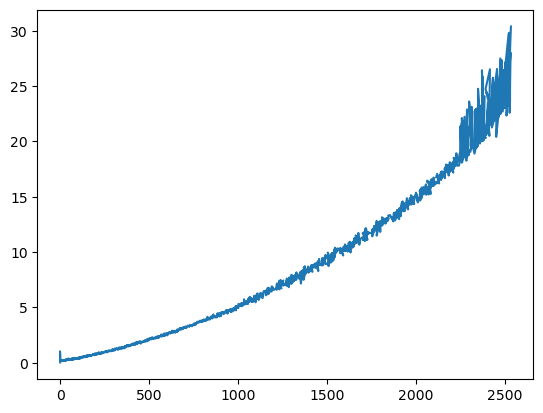

24.935942559481912

In [18]:
df = process_data('data/test22/2024-05-22-11-11-13.csv', 0.1, 4)

df.head()
plt.figure()
plt.plot(df.thrust, df.current)
plt.show()
i = df.current[df.thrust > 1266]
60 * 3 / i[:10].mean() * 0.8 * 1.23

data/test22/2024-05-22-09-07-23.csv
data/test22/2024-05-22-09-08-17.csv
data/test22/2024-05-22-09-15-32.csv
data/test22/2024-05-22-09-29-43.csv
data/test22/2024-05-22-09-36-44.csv
data/test22/2024-05-22-10-05-22.csv
data/test22/2024-05-22-10-07-04.csv
data/test22/2024-05-22-10-07-44.csv
data/test22/2024-05-22-10-58-07.csv
data/test22/2024-05-22-11-11-13.csv


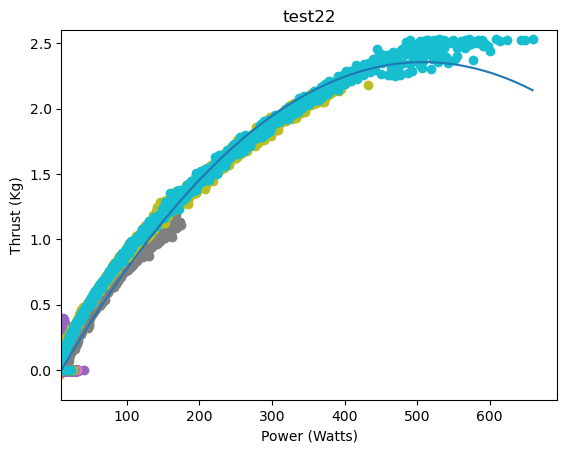

data/test23/2024-05-22-11-39-04.csv


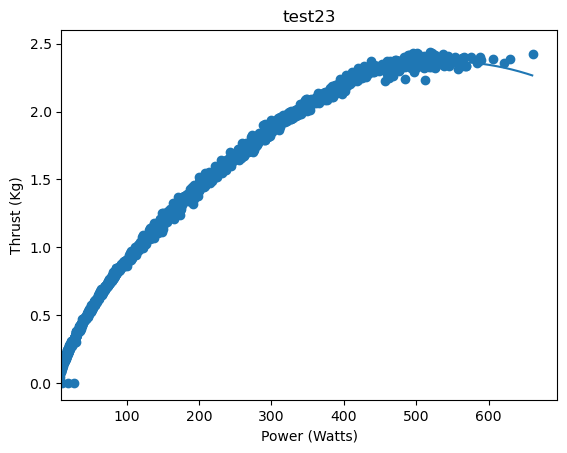

data/test25/2024-05-22-13-14-38.csv


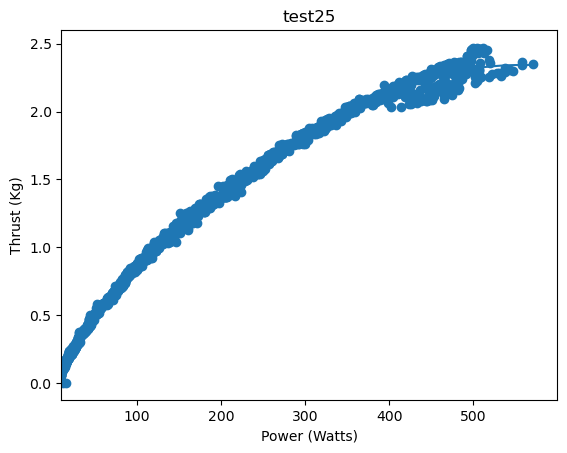

data/test26/2024-05-22-13-41-31.csv


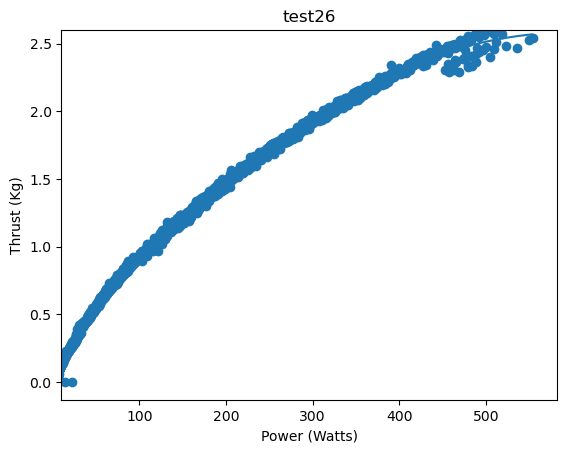

data/test27/2024-05-22-13-56-46.csv


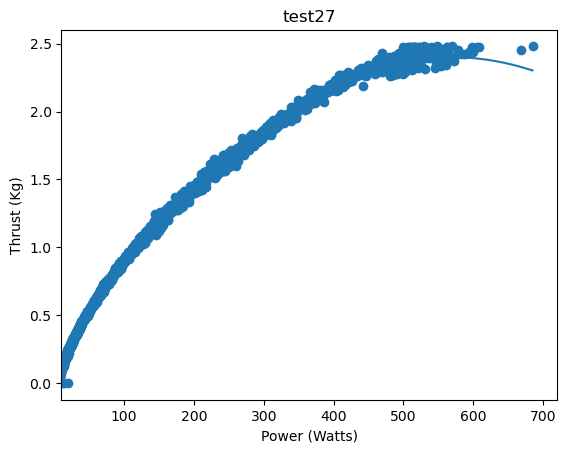

data/himax_11in_3s/2024-02-12-15-36-34.csv
data/himax_11in_3s/2024-02-12-15-40-12.csv
data/himax_11in_3s/2024-02-12-15-44-36.csv


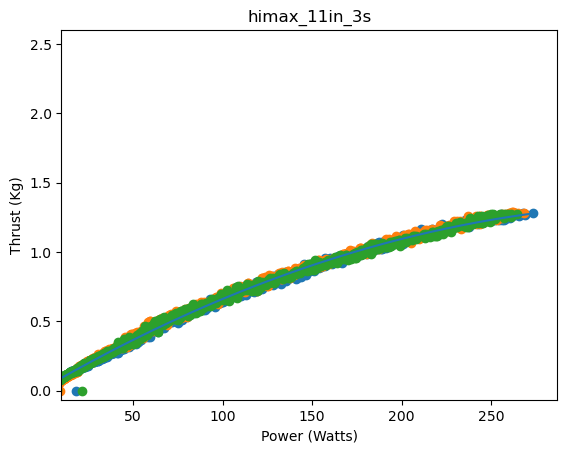

In [7]:
import os
# bigProp = tests[10:14]
# coaxs = tests[16:22]
# highV = tests[22:29]

def combine_data(name):
    tests = ['data/' + name + '/' + i for i in os.listdir('data/' + name + '/')]
    tests.sort()

    plt.figure()
    tot_p = np.array([])
    tot_t = np.array([])
    for i in tests:
        print(i)
        df = process_data(i, 0.1, 4)
        tot_p = np.concatenate((tot_p, df.power))
        tot_t = np.concatenate((tot_t, df.thrust_kg))
        plt.scatter(df.power, df.thrust_kg)
    
    p = np.polyfit(tot_p[tot_p > 3], tot_t[tot_p > 3], 2)
    X = np.arange(int(tot_p.max()))
    Y = np.polyval(p, X)
    plt.plot(X, Y)
    plt.xlim(left=10)
    plt.ylim(top=2.6)
    plt.xlabel("Power (Watts)")
    plt.ylabel("Thrust (Kg)")
    plt.title(name)
    plt.show()

    return [X, Y, tot_p, tot_t]

names = ['test22', 'test23', 'test25', 'test26', 'test27', 'himax_11in_3s']
outputs = dict()
for name in names:
    outputs[name] = combine_data(name)

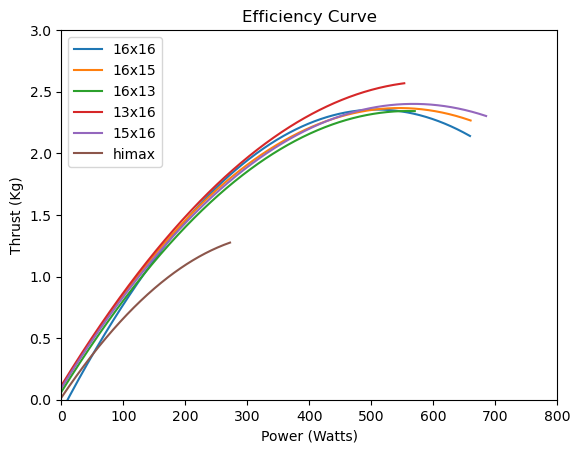

In [8]:
plt.figure()
for key in outputs:
    plt.plot(outputs[key][0], outputs[key][1])
# plt.hlines(0.8, 0, 400, colors='grey', linestyles='dashed')
plt.title("Efficiency Curve")
plt.legend(['16x16', '16x15', '16x13', '13x16', '15x16', 'himax'])
plt.ylabel("Thrust (Kg)")
plt.xlabel("Power (Watts)")
plt.xlim((0,800)), plt.ylim((0, 3))
plt.savefig('efficiency.png')
plt.show()

# plt.figure()
# for key in outputs:
#     plt.scatter(outputs[key][2], outputs[key][3])
# plt.title("Thrust vs. Power Curve")
# plt.legend(outputs.keys())
# plt.ylabel("Thrust (Kg)")
# plt.xlabel("Power (Watts)")
# plt.xlim((100, 350)), plt.ylim(bottom=0.2)
# plt.show()

#test22 - 16x16


In [9]:
bt = outputs['himax_11in_3s'][1]
bp = outputs['himax_11in_3s'][0]

at = outputs['coaxial_small'][1]
ap = outputs['coaxial_small'][0]

# hover_a = ap[(at > 1.3) & (at < 1.4)]
# hover_b = bp[(bt > 1.3) & (bt < 1.4)]

hover_a = ap[at > 0.8][0]
hover_b = bp[bt > 0.8][0]

print("16in hover power: ", hover_a)
print("12in hover power: ", hover_b)

ratio = hover_a / hover_b

print("ratio: ", 1 / ratio)

print("5 min: ", 5 / ratio)

KeyError: 'coaxial_small'